# TC5: Signal and Image Processing; Assignment 3 Noise

The aim of this assignment is to add noise to an image and then filter it using a Wiener filter.

First, let's import the necessary packages.

In [62]:
import imageio
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as pyl
from scipy import signal
import seaborn as sns
sns.set()

%matplotlib inline

In [63]:
image = imageio.imread('./Data/barbara.jpg')

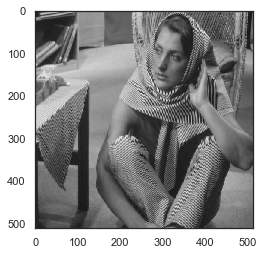

In [64]:
with sns.axes_style("white"):
    plt.imshow(image, cmap='gray')

For some reason, the image is imported as an RGB image (3 colour channels) which are all the same. Thus, only one channel is chosen.

In [65]:
image = image[:,:,0]
image.shape

(512, 512)

We need to generate several versions of the image with different Gaussian white noise levels, which is done using the following code.

In [66]:
def add_noise(image, SNR):
    noise = np.random.standard_normal(image.size).reshape(*image.shape)
    current_snr = np.mean(image) / np.std(noise)
    
    # small scalar is implemented to prevent division by zero
    noise *= (current_snr / (SNR + 1e-11))
    return image+noise

In [67]:
image_0dB = add_noise(image, 0)
image_5dB = add_noise(image, 5)
image_10dB = add_noise(image, 10)
image_15dB = add_noise(image, 15)
image_20dB = add_noise(image, 20)

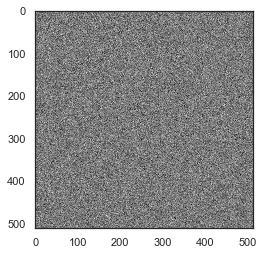

In [68]:
with sns.axes_style("white"):
    plt.imshow(image_0dB, cmap='gray')

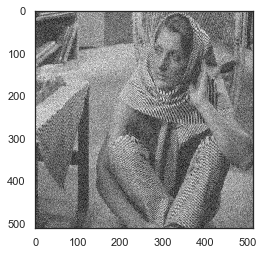

In [69]:
with sns.axes_style("white"):
    plt.imshow(image_5dB, cmap='gray')

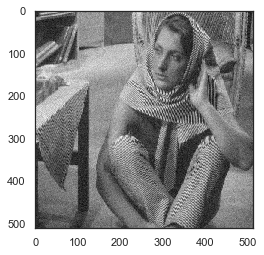

In [70]:
with sns.axes_style("white"):
    plt.imshow(image_10dB, cmap='gray')

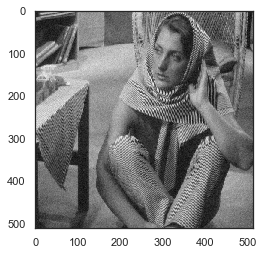

In [71]:
with sns.axes_style("white"):
    plt.imshow(image_15dB, cmap='gray')

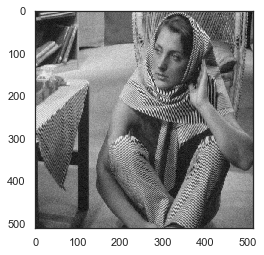

In [72]:
with sns.axes_style("white"):
    plt.imshow(image_20dB, cmap='gray')

As is evident from the images, the noise decreases as the SNR increases, which makes sense considering the definition of SNR.

What now needs to happen is to denoise all the generated images using the Wiener filter, which is implemented in the signal package in the scipy library.

In [73]:
image_0dB_filtered = signal.wiener(image_0dB)
image_5dB_filtered = signal.wiener(image_5dB)
image_10dB_filtered = signal.wiener(image_10dB)
image_15dB_filtered = signal.wiener(image_15dB)
image_20dB_filtered = signal.wiener(image_20dB)

Image with 0dB SNR


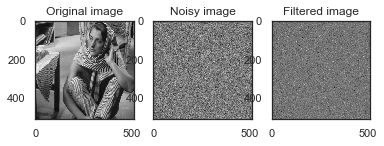

In [74]:
with sns.axes_style("white"):
    print("Image with 0dB SNR")
    plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.subplot(1,3,2), plt.imshow(image_0dB, cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3), plt.imshow(image_0dB_filtered, cmap='gray')
    plt.title('Filtered image')

Image with 5dB SNR


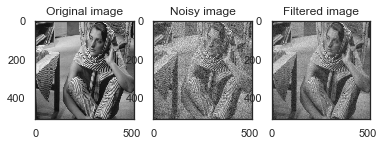

In [75]:
with sns.axes_style("white"):
    print("Image with 5dB SNR")
    plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.subplot(1,3,2), plt.imshow(image_5dB, cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3), plt.imshow(image_5dB_filtered, cmap='gray')
    plt.title('Filtered image')

Image with 10dB SNR


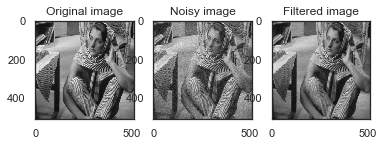

In [76]:
with sns.axes_style("white"):
    print("Image with 10dB SNR")
    plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.subplot(1,3,2), plt.imshow(image_10dB, cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3), plt.imshow(image_10dB_filtered, cmap='gray')
    plt.title('Filtered image')

Image with 15dB SNR


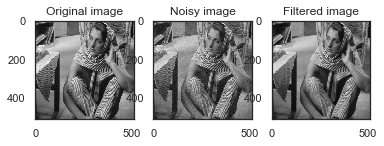

In [77]:
with sns.axes_style("white"):
    print("Image with 15dB SNR")
    plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.subplot(1,3,2), plt.imshow(image_15dB, cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3), plt.imshow(image_15dB_filtered, cmap='gray')
    plt.title('Filtered image')

Image with 20dB SNR


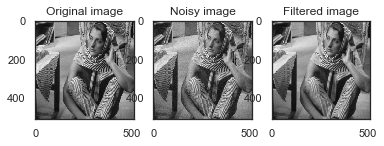

In [78]:
with sns.axes_style("white"):
    print("Image with 20dB SNR")
    plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.subplot(1,3,2), plt.imshow(image_20dB, cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1,3,3), plt.imshow(image_20dB_filtered, cmap='gray')
    plt.title('Filtered image')

As becomes evident, the images, after being filtered, are a lot closer to the original images than the noisy images. Still, there is some loss in quality as the Wiener filter somewhat smoothens the message. Still, it does a very good job at filtering noise and trying to reproduce the original image, even at lower SNR noisy images.